# Heart Disease Statistics Group Final Report 

## Authors: Nicholas Tam, Hanxi Chen, Levi Zeng, Xinyang Deng

## Group: 4

## 1. Introduction
### 1.1. Background Information
There are numerous studies that have indicated strong associations of coronary heart disease with a wide variety of factors, including age and sex (Lloyd-Jones, Larson, Beiser, Levy, 1999), blood pressure (Lawes, Bennett, Lewington, Rodgers, 2003), and serum cholesterol level (Law, Wald, Thompson, 1994). However, given that the majority of the given factors have significant associations with one another, such as cholesterol level with age and sex (Beckett, N., Nunes, M., & Bulpitt, C., 2000), along with the sheer quantity of potential risk factors (Hajar, 2017), it is unclear how these factors could be combined to model and predict the diagnosis of coronary heart disease.

### 1.2. Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Numerical", "Categorical", "Categorical", "Numerical", "Numerical", "Categorical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversible defect", "0: < 50% diameter narrowing; 1+: > 50% diameter narrowing"),
  AnyMissingValues = c("No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No")
)
myTable

Variable,Definition,Type,Unit,Categories,AnyMissingValues
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
age,Age,Numerical,Years,N/A,No
sex,Sex,Categorical,N/A,0: Female; 1: Male,No
cp,Chest pain type,Categorical,N/A,1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic,No
trestbps,Resting blood pressure on admission to hospital,Numerical,mmHg,N/A,Yes
chol,Serum cholesterol,Numerical,mg/dl,N/A,Yes
fbs,Presence of high blood sugar,Categorical,N/A,0: False; 1: True,Yes
restecg,Resting electrocardiographic results,Categorical,N/A,0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria,Yes
thalach,Maximum heart rate achieved,Numerical,BPM,N/A,Yes
exang,Exercise induced angina,Categorical,N/A,0: No; 1: Yes,Yes


Our project question is:

#### “Given the sample data for angiography patients, what model would be most effective in predicting each patient’s diagnosis?”

Our analysis will involve the development of a predictive model to estimate the likelihood of angiographic coronary disease based on these variables. Additionally, we will explore regional variations and demographic influences on heart disease risk. This research question is primarily focused on both predictions, as we seek to generate a predictive model given the provided data to estimate diagnoses of new observations. Inference will also be required to a lesser extent, as we aim to gain insights into the factors influencing the likelihood of coronary disease diagnosis in different locations and demographic groups. 

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("remotes")
# remotes::install_github("tidymodels/infer")
# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots
library(GGally) # Provides correlation between variables
library(tidymodels) # Modelling with training and testing
library(car) # Applied regression tools, including VIF
library(leaps) # Exhaustive search for the best subsets of the variables in x for predicting y in linear regression
library(glmnet) # Regularised regression models
library(mltools) # Regression metrics
library(caret) # Streamline the process for creating predictive models
library(boot) # Allows easy generattion of bootstrap samples of virtually any statistic that they can calculate in R
library(pROC) # Display and analyse ROC curves 
library(MASS) # Support functions and datasets for Venables and Ripley's MASS # WARNING: select() MAY HAVE ISSUES WITH USE IF THIS IS LOADED


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────

### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to; the reference level is set to "Cleveland", the clinic the initial model was derived from.
- The `age`, `sex`, `cp`, `trestbps`, `chol`, `thalach`, and `num` columns require a change in data type to be used as intended.
- Due to several datasets either missing most or all data for `fbs`, `oldpeak`, `slope`, `ca` and `thal` columns, the columns have been removed under the assumption that they are irrelevant or are results from the initial model.
- Any patients with "?" for any variables, `trestbps == 0` or `chol == 0` are assumed to be invalid and have been removed.
- The Switzerland dataset has `chol == 0` for all data and as such has been removed.
- Any values of `num >= 1` provide the same result, and thus have been converted to 1.

In [3]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
# head(California_heart)
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num))  %>% 
    # transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.double(as.factor(trestbps)), chol = as.double(as.factor(chol)), thalach = as.double(as.factor(thalach))) 
    transform(sex = as.factor(sex), cp = as.factor(cp), trestbps = as.double(trestbps), chol = as.double(chol), restecg = as.factor(restecg), thalach = as.double(thalach), num = as.factor(num)) 
# %>% 
total_heart$location <- factor(total_heart$location) %>% 
    relevel(total_heart$location, ref = "Cleveland")
# total_heart$num <- factor(total_heart$num, levels = c(0, 1), labels = c("0: Without Disease", "1: With Disease"))

head(total_heart)
tail(total_heart)

,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
1,Cleveland,63,1,1,145,233,2,150,0,0
2,Cleveland,67,1,4,160,286,2,108,1,1
3,Cleveland,67,1,4,120,229,2,129,1,1
4,Cleveland,37,1,3,130,250,0,187,0,0
5,Cleveland,41,0,2,130,204,2,172,0,0
6,Cleveland,56,1,2,120,236,0,178,0,0


,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
669,California,53,1,4,144,300,1,128,1,1
670,California,62,1,4,158,170,1,138,1,1
671,California,46,1,4,134,310,0,126,0,1
672,California,54,0,4,127,333,1,154,0,1
673,California,55,1,4,122,223,1,100,0,1
674,California,62,1,2,120,254,2,93,1,1


### 2.3. Exploratory Data Analysis
- Since our research question is predictive (as discussed above), and the response variable is categorical, logistic regression will be applied in future model fittings. 
- For our exploratory data analysis, we want to check if there is a clear relationship between the predictors and the response variable `num`. 

#### 2.3.1. Barplot for Categorical Variables
- Bar plots display the distribution of categorical predictor variables `location`, `sex`, `cp`, and `restecg`, with the coloured proportion representing the proportion of response levels at that level of predictor. 
- Allows us to assess whether the prevalence of coronary heart disease varies significantly between different predictor variable levels.
- `location`: Significantly higher proportion of observations from California diagnosed with coronary heart disease compared to other locations.
- `sex`: Significantly higher proportion of males diagnosed with heart disease compared to females.
- `cp`: Significantly higher proportion of people with asymptomatic chest pain diagnosed with coronary heart disease compared to those with other types of chest pain, which is consistent with professional knowledge. 
- `restecg`: No significant difference in proportions of diagnoses between each type of result.
- `location`, `sex` and `cp` are more likely to be relevant predictors than `restecg`.

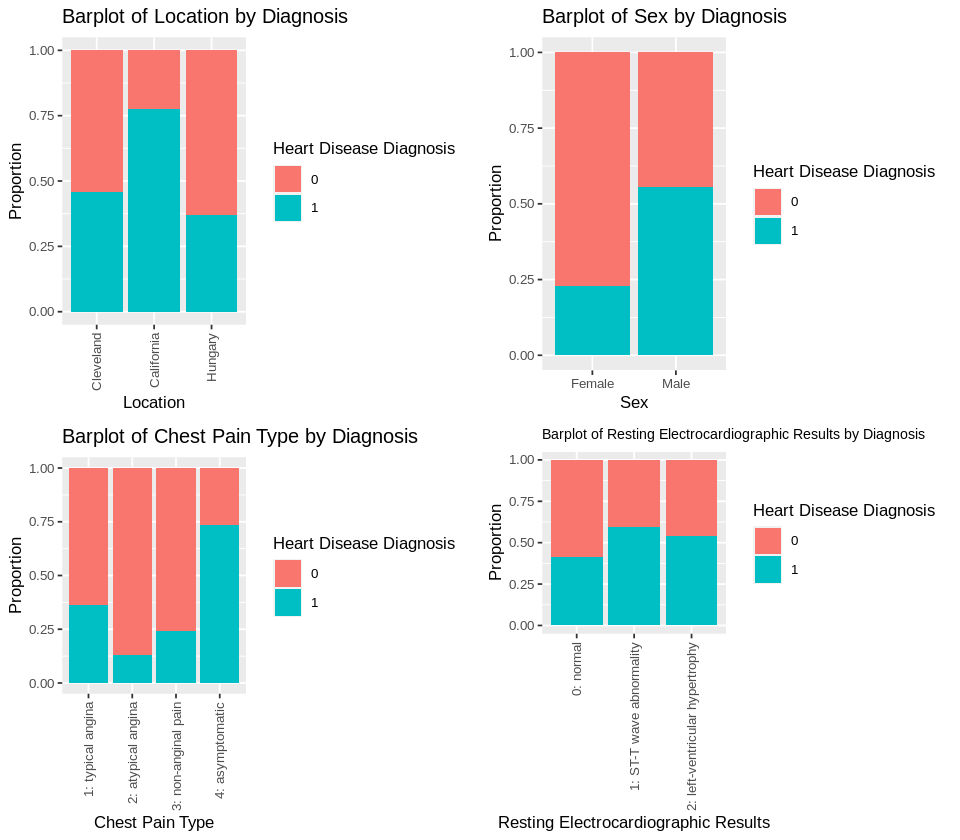

In [4]:
options(repr.plot.width = 8, repr.plot.height = 7)

location_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = location, fill = num), position = "fill") +
    labs(title = "Barplot of Location by Diagnosis", 
         x = "Location", 
         y = "Proportion", 
         fill = "Heart Disease Diagnosis"
        ) + 
    theme(text = element_text(size = 10), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), )

sex_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = as.factor(sex), fill = num), position = "fill") +
    scale_x_discrete(labels = c("Female", "Male")) +
    labs(title = "Barplot of Sex by Diagnosis",
       x = "Sex",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 10))

cp_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = cp, fill = num), position = "fill") +
    scale_x_discrete(labels = c("1: typical angina", "2: atypical angina", 
                                "3: non-anginal pain", "4: asymptomatic")) +
    labs(title = "Barplot of Chest Pain Type by Diagnosis",
       x = "Chest Pain Type",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 10), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),)

restecg_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = restecg, fill = num), position = "fill") +
    scale_x_discrete(labels = c("0: normal", "1: ST-T wave abnormality", 
                                "2: left-ventricular hypertrophy")) +
    labs(title = "Barplot of Resting Electrocardiographic Results by Diagnosis",
       x = "Resting Electrocardiographic Results",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(plot.title = element_text(size = 8.5), text = element_text(size = 10),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),)

grid.arrange(location_plot, sex_plot, cp_plot, restecg_plot)

#### 2.3.2. Boxplot for Continuous Variables
- Difference in variability of resting blood pressure between diagnosed and undiagnosed patients is the largest amongst the continuous input variables, with a slightly higher mean and median in those diagnosed.
- Undiagnosed group has a higher average and median maximum heart rate. 
- Diagnosed group have a higher mean and median age, with ages skewed toward lower values.
- Mean and median cholesterol levels are most similar between both groups, but the comparison has the most outliers.

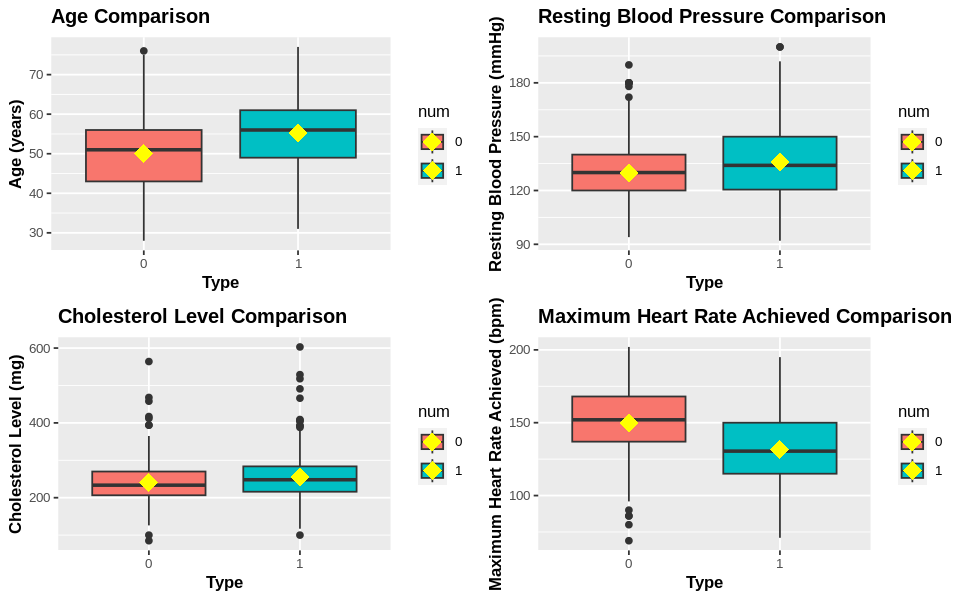

In [5]:
options(repr.plot.width = 8, repr.plot.height = 5)

age_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, age, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Age Comparison") +
    xlab("Type") +
    ylab("Age (years)") +
    stat_summary(aes(num, age, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

trestbps_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, trestbps, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Resting Blood Pressure Comparison") +
    xlab("Type") +
    ylab("Resting Blood Pressure (mmHg)") +
    stat_summary(aes(num, trestbps, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

chol_num_boxplots <- total_heart %>%
    filter(location != "Switzerland") %>%
    ggplot() +
    geom_boxplot(aes(num, chol, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Cholesterol Level Comparison") +
    xlab("Type") +
    ylab("Cholesterol Level (mg)") +
    stat_summary(aes(num, chol, fill = num),
    fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
)

thalach_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, thalach, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Maximum Heart Rate Achieved Comparison") +
    xlab("Type") +
    ylab("Maximum Heart Rate Achieved (bpm)") +
    stat_summary(aes(num, thalach, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

grid.arrange(age_num_boxplots, trestbps_num_boxplots, chol_num_boxplots, thalach_num_boxplots)

#### 2.3.3. Variance Inflation Factor (VIF) on variables
- VIF for each variable is calculated to test for multicollinearity, which could make it difficult to interpret coefficients, and it reduces the power of the model to identify statistically significant independent variables.
- `GVIF..1..2.Df..` is used for comparison due to different degrees of freedom for some variables.
- Horizontal line of VIF = 5 to indicate severe correlation of a variable with other variables; any variables with VIF > 5 are to be removed to reduce multicollinearity in the model.
- `GVIF..1..2.Df..` for all variables are significantly lower than 5, so multicollinearity between all variables is relatively low, thus no variables need to be removed.

,GVIF,Df,GVIF..1..2.Df..,variable
,<dbl>,<dbl>,<dbl>,<chr>
location,2.409002,2,1.245831,location
age,1.501386,1,1.225311,age
sex,1.126742,1,1.061481,sex
cp,1.200695,3,1.030953,cp
trestbps,1.107297,1,1.052282,trestbps
chol,1.080300,1,1.039375,chol
restecg,1.631578,2,1.130191,restecg
thalach,1.497189,1,1.223597,thalach
exang,1.115779,1,1.056304,exang


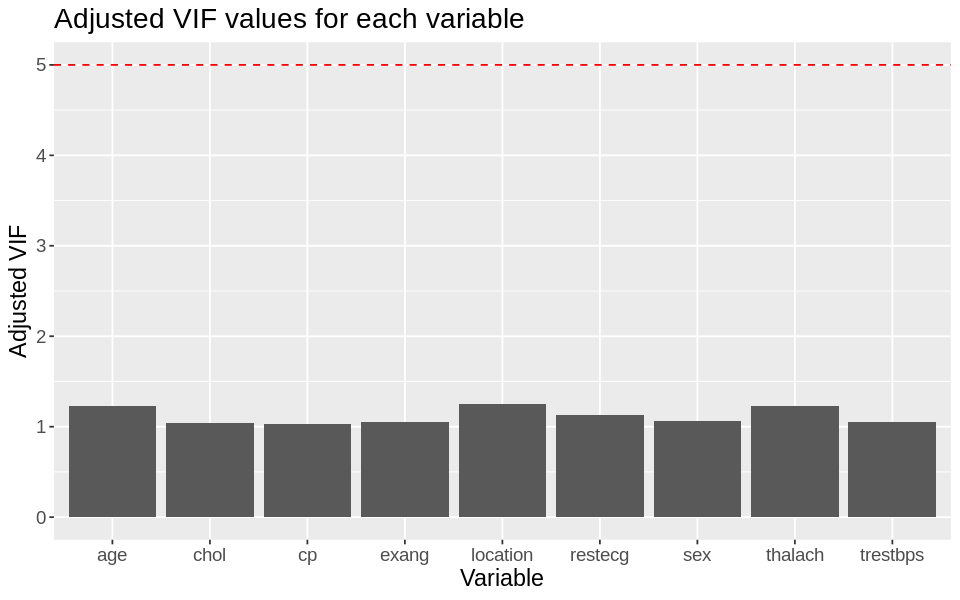

In [6]:
options(repr.plot.width = 8, repr.plot.height = 5)

VIF_prep <- glm(num ~ ., data = total_heart, family = binomial)
heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
# heart_MLR_add_inter_VIF <- vif(VIF_prep)
heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "chol", "restecg", "thalach", "exang") 
heart_MLR_add_inter_VIF

# VIF graph
heart_MLR_add_inter_VIF_vis <- ggplot(heart_MLR_add_inter_VIF, aes(x = variable, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    ggtitle("Adjusted VIF values for each variable") +
    labs(x = "Variable", y = "Adjusted VIF") + 
    geom_hline(yintercept = 5, linetype = "dashed", color = "red") +
    theme(text = element_text(size = 14))
heart_MLR_add_inter_VIF_vis

#### 2.3.4. Empirical logit Plots for Logistic Regression Specification Search 
- Logistic regression requires that there is a linear relationship between the predictors and the log-odds (logit) of the response.
- Continuous predictor variables are tested with the given `emplogit()` function. (Schell, n.d.)
- Relationships of `trestbps` and `thalach` with `num` are significantly more linear than relationships of `age` and `chol` with `num`.

In [7]:
emplogit = function(x, y, binsize = NULL, ci = FALSE, probit = FALSE,
                    prob = FALSE, main = NULL, xlab = "", ylab = ""){
  # x         vector with values of the independent variable
  # y         vector of binary responses
  # binsize   integer value specifying bin size (optional)
  # ci        logical value indicating whether to plot approximate
  #           confidence intervals (not supported as of 02/08/2015)
  # probit    logical value indicating whether to plot probits instead
  #           of logits
  # prob      logical value indicating whether to plot probabilities
  #           without transforming
  #
  # the rest are the familiar plotting options

  if (length(x) != length(y))
    stop("x and y lengths differ")
  if (any(y < 0 | y > 1))
    stop("y not between 0 and 1")
  if (length(x) < 100 & is.null(binsize))
    stop("Less than 100 observations: specify binsize manually")

  if (is.null(binsize)) binsize = min(round(length(x)/10), 50)

  if (probit){
    link = qnorm
    if (is.null(main)) main = "Empirical probits"
  } else {
    link = function(x) log(x/(1-x))
    if (is.null(main)) main = "Empirical logits"
  }

  sort = order(x)
  x = x[sort]
  y = y[sort]
  a = seq(1, length(x), by=binsize)
  b = c(a[-1] - 1, length(x))

  prob = xmean = ns = rep(0, length(a)) # ns is for CIs
  for (i in 1:length(a)){
    range = (a[i]):(b[i])
    prob[i] = mean(y[range])
    xmean[i] = mean(x[range])
    ns[i] = b[i] - a[i] + 1 # for CI 
  }

  extreme = (prob == 1 | prob == 0)
  prob[prob == 0] = min(prob[!extreme])
  prob[prob == 1] = max(prob[!extreme])

  g = link(prob) # logits (or probits if probit == TRUE)

  linear.fit = lm(g[!extreme] ~ xmean[!extreme])
  b0 = linear.fit$coef[1]
  b1 = linear.fit$coef[2]

  loess.fit = loess(g[!extreme] ~ xmean[!extreme])

    plot(xmean, g, main=main, xlab=xlab, ylab=ylab)
    abline(b0,b1)
    lines(loess.fit$x, loess.fit$fitted, lwd=2, lty=2)
}

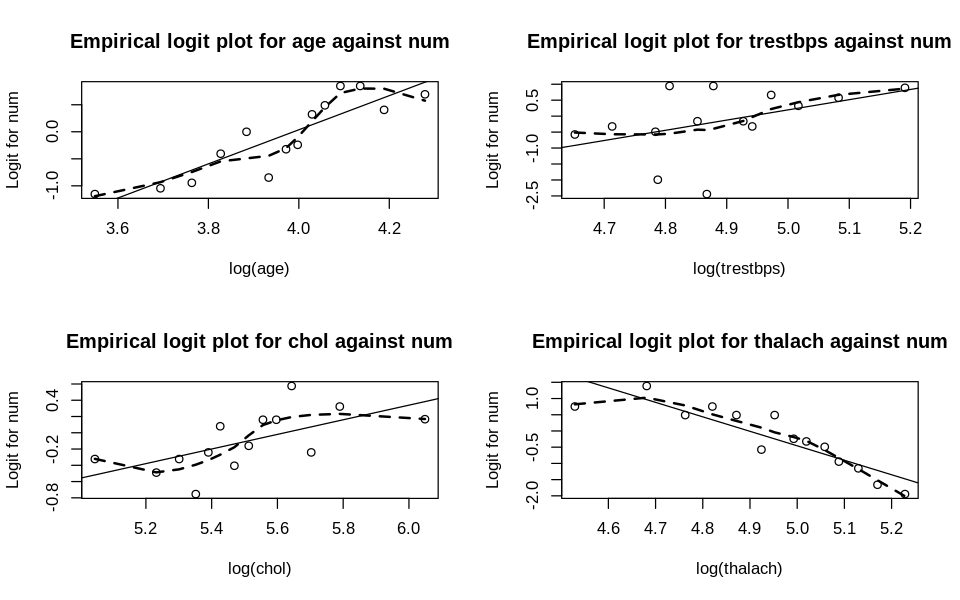

In [8]:
options(repr.plot.width = 8, repr.plot.height = 5)
total_heart1 <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num)) %>%
    transform(trestbps = as.double(trestbps), chol = as.double(chol), restecg = as.factor(restecg), thalach = as.double(thalach))

x1 = total_heart1$age
x2 = total_heart1$trestbps
x3 = total_heart1$chol
x4 = total_heart1$thalach
y = total_heart1$num
par(mfrow = c(2, 2))
emplogit(log(x1), y, main = "Empirical logit plot for age against num", xlab = "log(age)", ylab = "Logit for num")
emplogit(log(x2), y, main = "Empirical logit plot for trestbps against num", xlab = "log(trestbps)", ylab = "Logit for num")
emplogit(log(x3), y, main = "Empirical logit plot for chol against num", xlab = "log(chol)", ylab = "Logit for num")
emplogit(log(x4), y, main = "Empirical logit plot for thalach against num", xlab = "log(thalach)", ylab = "Logit for num")
par(mfrow = c(1, 1))

## 3. Methods and Plan

The dataset contains measurements for coronary heart disease diagnosis in separate locations, and the VIF values for all explanatory variables are relatively low, allowing for variations in diagnosis due to potential confounding variables being accounted for.

Since we are seeking to assess the performance and generalization ability of our models, we will split our data into `total_heart_train` and `total_heart_test` for model training and evaluation.

In [9]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Splitting of data 
total_heart_2 <- total_heart %>% mutate(ID = row_number())
total_heart_train <- total_heart_2 %>% slice_sample(prop = 0.7)
total_heart_test <- total_heart_2 %>% anti_join(total_heart_train, by = "ID")
total_heart_train <- total_heart_train[, -ncol(total_heart_train)]
total_heart_test <- total_heart_test[, -ncol(total_heart_test)]
head(total_heart_train)
head(total_heart_test)

# Creation of matrices
total_heart_train_X <- total_heart_train[, -which(names(total_heart_train) == "num")]
total_heart_train_Y <- total_heart_train[, which(names(total_heart_train) == "num")]
# head(total_heart_train_X)

total_heart_test_X <- total_heart_test[, -which(names(total_heart_test) == "num")]
total_heart_test_Y <- total_heart_test[, which(names(total_heart_test) == "num")]

,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
1,Cleveland,57,1,4,130,131,0,115,1,1
2,Cleveland,56,1,2,120,240,0,169,0,0
3,Hungary,56,0,3,130,219,1,164,0,0
4,Hungary,52,1,4,140,266,0,134,1,1
5,Cleveland,42,0,3,120,209,0,173,0,0
6,Cleveland,50,0,2,120,244,0,162,0,0


,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
1,Cleveland,62,0,4,140,268,2,160,0,1
2,Cleveland,57,0,4,120,354,0,163,1,0
3,Cleveland,56,0,2,140,294,2,153,0,0
4,Cleveland,44,1,2,120,263,0,173,0,0
5,Cleveland,52,1,3,172,199,0,162,0,0
6,Cleveland,57,1,3,150,168,0,174,0,0


- Logistic regression models are used to estimate and infer the true relation between different types of variables and binary response `num` through the hypothesis testing for the parameters $\beta_{j}$.
- `exponentiate = TRUE` is applied to `tidy()` to convert all variables in a manner that allows for a direct interpretation of results.
- Assumptions:
    - Response variable `num` is binary or binomial.
    - Variance follows the binomial variance structure such that the variance is highest when the proportion of success is 0.5.
    - There is a linear relationship between the predictors and the log-odds (logit) of the response.
    - Each observation is independent of one another.
    - Sufficiently large sample size. 
    - Low multicollinearity between predictor variables (Tested with VIF).
    - Residuals are independent of each other.
- Limitations: 
    - Model may be prone to overfitting, particularly when the number of predictor variables is large relative to the sample size.
    - Model may be biased due to one of the `num` values potentially being significantly more frequent than the other.
    - When using a complete case analysis, the variables that are removed because of missing values could contain data that varies from the data we analyzed, causing bias.
    - The dataset we have used includes data that has also been created from previous models, potentially causing the dataset to be biased.
    - Residuals following logistic distribution cannot be directly tested.
    - Inaccurate definition of variables may make interpretation of results difficult.
        - High or low fasting blood sugar (`fbs`) could be a fluctuation due to unhealthy habits such as sleeping late or skipping meals, and not necessarily related to heart disease.
        - Resting blood pressure (`trestbp`) is only taken upon admission to the hospital, with no other blood pressure data that could indicate alternative possiblities.
        - Can  assume patients first being brought into the hospital will be sicker in general, and thus have a more fluctuated blood pressure.
- Hypothesis tests for continuous variable coefficient $\beta_{j}$: 
    - $H_0: \beta_{j} = 0$ 
    - $H_1: \beta_{j} \neq 0$
- Hypothesis test for categorical variable level X compared to its reference level Y: 
    - $H_0:$ With all other variables being equal, the mean number of people diagnosed with coronary heart disease is equal between group X and group Y
    - $H_1:$ With all other variables being equal, the mean number of people diagnosed with coronary heart disease is significantly different between group X and group Y

### 3.1. Logistic Regression Models with Stepwise Akaike Information Criterion (AIC) 
- Stepwise model selection to identify variables that are most relevant and informative for predicting `num`.
- Akaike Information Criterion (AIC) asymptotically measures mean square error. 
- Used hybrid selection for more comprehensive search on relevant and influential variables.
- May risk overfitting to training data. 

#### 3.1.1. Fitting Regular Logistic Regression Model

In [10]:
# Fit logistic regression model given training data
total_heart_binary_log_model_train <- 
  glm(
       formula = num ~ .,
       data = total_heart_train,
       family = binomial
  )
# total_heart_binary_log_model_train_tidy <- tidy(total_heart_binary_log_model_train, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>%
#     mutate(reject.H0 = ifelse(p.value <= 0.05, TRUE, FALSE))
# total_heart_binary_log_model_train_tidy
summary(total_heart_binary_log_model_train)
# total_heart_binary_log_model_train


Call:
glm(formula = num ~ ., family = binomial, data = total_heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5639  -0.6586  -0.2527   0.6523   2.5508  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -4.411053   1.781129  -2.477   0.0133 *  
locationCalifornia -0.366180   0.451210  -0.812   0.4170    
locationHungary    -0.372162   0.339729  -1.095   0.2733    
age                 0.029046   0.016372   1.774   0.0760 .  
sex1                1.545558   0.313092   4.936 7.96e-07 ***
cp2                -0.961142   0.564730  -1.702   0.0888 .  
cp3                -0.679984   0.536114  -1.268   0.2047    
cp4                 0.817753   0.511373   1.599   0.1098    
trestbps            0.015944   0.007100   2.245   0.0247 *  
chol                0.002879   0.002203   1.307   0.1913    
restecg1           -0.295869   0.413147  -0.716   0.4739    
restecg2           -0.108911   0.319546  -0.341   0.7332    
tha

#### 3.1.2. Fitting stepAIC Logistic Regression Model
- `stepAIC()` designed to find the model that explains the most variation in the data through stepwise selection, while penalising models that use an excessive number of parameters.
- `stepAIC()` Allows dummy variables to be grouped together during variable selection. 

In [11]:
# Stepwise selection with AIC (Use training dataset)
total_heart_AIC_model <- stepAIC(total_heart_binary_log_model_train, direction = "both")
total_heart_AIC_model

Start:  AIC=460.6
num ~ location + age + sex + cp + trestbps + chol + restecg + 
    thalach + exang

           Df Deviance    AIC
- restecg   2   433.17 457.17
- location  2   433.96 457.96
- chol      1   434.36 460.36
<none>          432.60 460.60
- age       1   435.78 461.78
- thalach   1   436.22 462.22
- trestbps  1   437.72 463.72
- exang     1   459.19 485.19
- sex       1   459.96 485.96
- cp        3   472.52 494.52

Step:  AIC=457.17
num ~ location + age + sex + cp + trestbps + chol + thalach + 
    exang

           Df Deviance    AIC
- location  2   435.16 455.16
- chol      1   434.88 456.88
<none>          433.17 457.17
- age       1   436.15 458.15
- thalach   1   436.84 458.84
- trestbps  1   438.00 460.00
+ restecg   2   432.60 460.60
- exang     1   459.51 481.51
- sex       1   461.47 483.47
- cp        3   472.59 490.59

Step:  AIC=455.16
num ~ age + sex + cp + trestbps + chol + thalach + exang

           Df Deviance    AIC
- chol      1   436.78 454.78
<none>  


Call:  glm(formula = num ~ age + sex + cp + trestbps + thalach + exang, 
    family = binomial, data = total_heart_train)

Coefficients:
(Intercept)          age         sex1          cp2          cp3          cp4  
  -4.548883     0.034357     1.449743    -1.010187    -0.690059     0.807637  
   trestbps      thalach       exang1  
   0.014942    -0.007934     1.346658  

Degrees of Freedom: 470 Total (i.e. Null);  462 Residual
Null Deviance:	    649.4 
Residual Deviance: 436.8 	AIC: 454.8

#### 3.1.3. Confusion Matrices for Logistic Regression Models
- Used to define performance of models 

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 88 20
         1 12 83
                                          
               Accuracy : 0.8424          
                 95% CI : (0.7848, 0.8896)
    No Information Rate : 0.5074          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.685           
                                          
 Mcnemar's Test P-Value : 0.2159          
                                          
            Sensitivity : 0.8058          
            Specificity : 0.8800          
         Pos Pred Value : 0.8737          
         Neg Pred Value : 0.8148          
             Prevalence : 0.5074          
         Detection Rate : 0.4089          
   Detection Prevalence : 0.4680          
      Balanced Accuracy : 0.8429          
                                          
       'Positive' Class : 1               
                                    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 86 21
         1 14 82
                                          
               Accuracy : 0.8276          
                 95% CI : (0.7685, 0.8769)
    No Information Rate : 0.5074          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6554          
                                          
 Mcnemar's Test P-Value : 0.3105          
                                          
            Sensitivity : 0.7961          
            Specificity : 0.8600          
         Pos Pred Value : 0.8542          
         Neg Pred Value : 0.8037          
             Prevalence : 0.5074          
         Detection Rate : 0.4039          
   Detection Prevalence : 0.4729          
      Balanced Accuracy : 0.8281          
                                          
       'Positive' Class : 1               
                                    

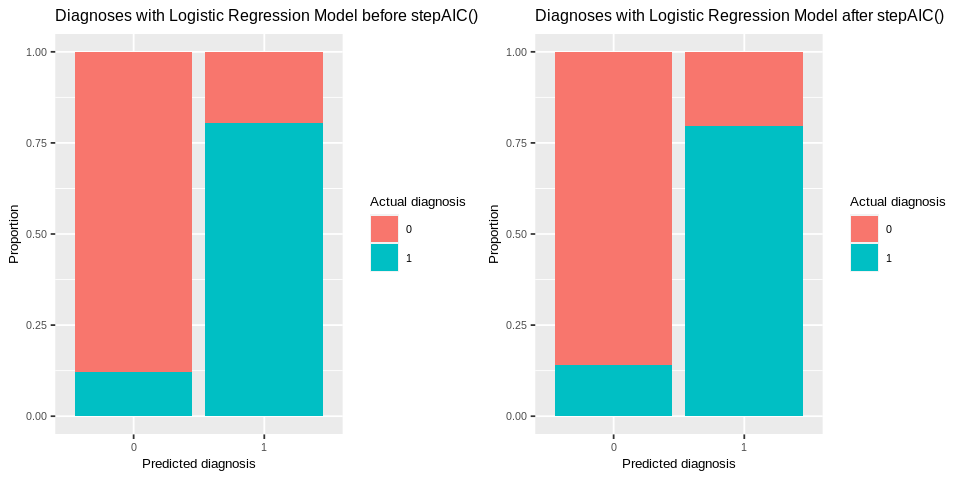

In [12]:
options(repr.plot.width = 8, repr.plot.height = 4)

# Predicted classes for testing set (Before stepAIC)
total_heart_pred_class_init <- round(predict(total_heart_binary_log_model_train, total_heart_test, type = "response"), 0)

# Obtain pre-stepAIC confusion matrix given classes predicted from testing model, real classes, and positive value
total_heart_confusion_matrix_init <- 
    confusionMatrix(
        data = as.factor(total_heart_pred_class_init),
        reference = as.factor(total_heart_test$num),
        positive = "1"
)
total_heart_confusion_matrix_init

plot_init <- total_heart_test %>% 
    # mutate(num = ifelse(num == "1", "1","0")) %>% 
    ggplot() + 
    geom_bar(aes(x = num, fill = as.factor(total_heart_pred_class_init)), position = "fill") +
    ggtitle("Diagnoses with Logistic Regression Model before stepAIC()") +
    xlab("Predicted diagnosis") +
    ylab("Proportion") +
    scale_fill_discrete(name = "Actual diagnosis", labels = c("0", "1")) +
    theme(text = element_text(size = 8))
# plot_init

# Predicted classes for training set (After stepAIC)
total_heart_pred_class_AIC <- round(predict(total_heart_AIC_model, total_heart_test, type = "response"), 0)
# total_heart_pred_class_AIC <- as.integer(predict(total_heart_AIC_model, total_heart_test, type = "response") > 0.5)
# head(total_heart_pred_class_AIC)

# Obtain post-stepAIC confusion matrix given classes predicted from training model, real classes, and positive value
total_heart_confusion_matrix_AIC <- 
    confusionMatrix(
        data = as.factor(total_heart_pred_class_AIC),
        reference = as.factor(total_heart_test$num),
        positive = "1"
)
total_heart_confusion_matrix_AIC

plot_AIC <- total_heart_test %>% 
    mutate(num = ifelse(num == 1, "1","0")) %>% 
    ggplot() +
    geom_bar(aes(x = num, fill = as.factor(total_heart_pred_class_AIC)), position = "fill") +
    ggtitle("Diagnoses with Logistic Regression Model after stepAIC()") +
    labs(y = "Proportion", x = "Predicted diagnosis") +
    scale_fill_discrete(name = "Actual diagnosis", labels = c("0", "1")) +
    theme(text = element_text(size = 8))
# plot_AIC
grid.arrange(plot_init, plot_AIC, ncol = 2)
# plot_init
# plot_AIC

#### 3.1.4. Out-of-sample Error Rates
- Training error rate used for estimation of out-of-sample error rate through cross validation.
- Using cross validation to estimate out-of-sample error rates for each model. 

In [13]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Training error rate (May underestimate out-of-sample error)
misclassification_rate <- function(y, p.hat){
    y_hat <- round(p.hat, 0)
    error_rate <- mean(abs(y - y_hat))
    return(error_rate)
}

# Training error rate (Before stepAIC)
error_rate_train_init <- 
    misclassification_rate(
        total_heart_train$num, 
        predict(total_heart_binary_log_model_train, total_heart_test, type = "response")
    )
# error_rate_train_init

# Estimate out-of-sample error rate with cross validation (Before stepAIC)
cv_logistic_init <- 
    cv.glm(
        glmfit = total_heart_binary_log_model_train, 
        data = total_heart_test, 
        K = 10, 
        cost = misclassification_rate
    )

# Training error rate (After stepAIC)
error_rate_train_AIC <- 
    misclassification_rate(
        total_heart_train$num, 
        predict(total_heart_AIC_model, total_heart_train, type = "response")
    )
# error_rate_train_AIC

# Estimate out-of-sample error rate with cross validation (After stepAIC)
cv_logistic_AIC <- 
    cv.glm(
        glmfit = total_heart_AIC_model, 
        data = total_heart_test, 
        K = 10, 
        cost = misclassification_rate
    )

total_heart_AUC_models <- tibble(
    model = c("Regular", "After stepAIC"),
    # misclassification_rate = c(error_rate_train_init, error_rate_train_AIC),
    cv_logistic = c(cv_logistic_init$delta[1], cv_logistic_AIC$delta[1])
)

total_heart_AUC_models

Warning message in Ops.factor(y, y_hat):
“‘-’ not meaningful for factors”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a m

model,cv_logistic
<chr>,<dbl>
Regular,0.5369458
After stepAIC,0.5221675


#### 3.1.5. Predictive Performances of Logistic Regression Models
- Receiver operating characteristic (ROC) curves to evaluate predictive performance of models for all values of the class prediction threshold. 
    - Initial prediction threshold value is 0.5.

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



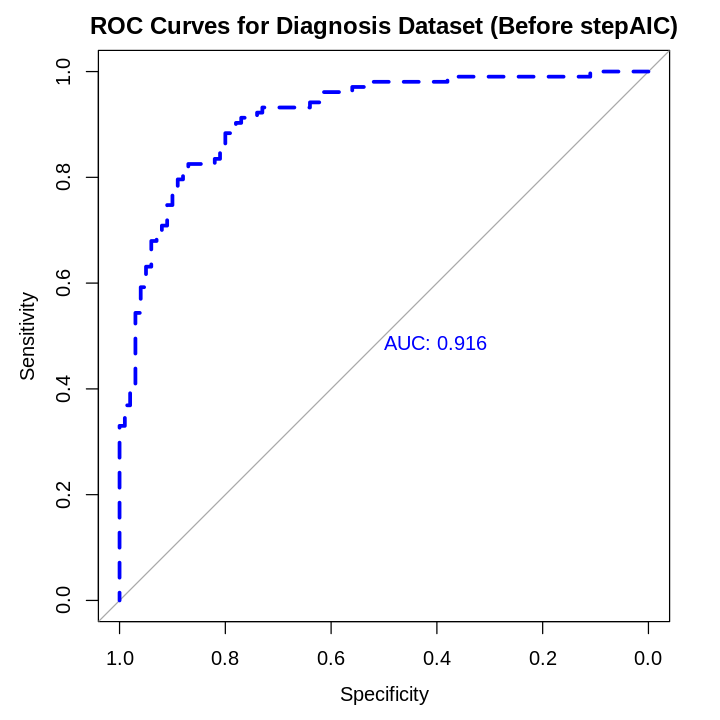

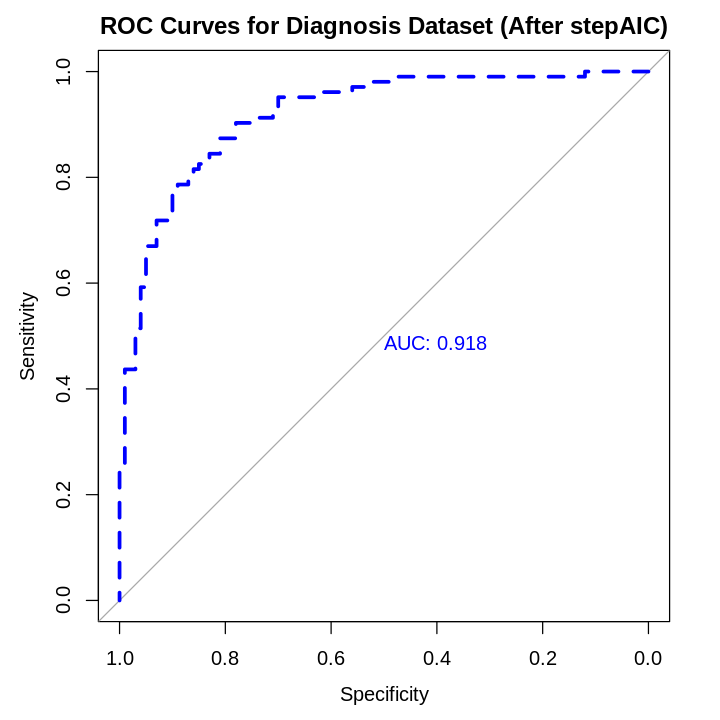

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6) # Adjust these numbers so the plot looks good in your desktop

# Evaluate predictive performance of given classifier for all possible values of p_0 (Before stepAIC)
ROC_full_log_init <- roc(
  response = total_heart_test_Y,
  predictor = predict(total_heart_binary_log_model_train, newdata = total_heart_test_X, type = "response")
)
plot(ROC_full_log_init,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diagnosis Dataset (Before stepAIC)"
)

# Evaluate predictive performance of given classifier for all possible values of p_0 (After stepAIC)
ROC_full_log_AIC <- roc(
  response = total_heart_test_Y,
  predictor = predict(total_heart_AIC_model, newdata = total_heart_test_X, type = "response")
)
plot(ROC_full_log_AIC,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diagnosis Dataset (After stepAIC)"
)

# grid.arrange(
#     plot(ROC_full_log_init,
#       print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
#       main = "ROC Curves for Diagnosis Dataset (Before stepAIC)"
#     ), 
#     plot(ROC_full_log_AIC,
#       print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
#       main = "ROC Curves for Diagnosis Dataset (After stepAIC)"
#     )
# )

### 3.2. Logistic Regression Models with Regularisation methods 
- Ridge and LASSO regression incorporate a penalty term that imposes a constraint on the absolute values of the regression coefficients. 
- LASSO may set some coefficients to exactly zero.
- Ridge retains all coefficients.
- Helps with identifying the most influential variables among location, age, sex, chest pain type, resting blood pressure, serum cholesterol, and resting ECG results that contribute to the likelihood of coronary disease.
- Intended to prevent overfitting and increases the model's ability to generalize to new, unseen data. 

#### 3.2.1. Optimum Lambda for Largest AUC

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

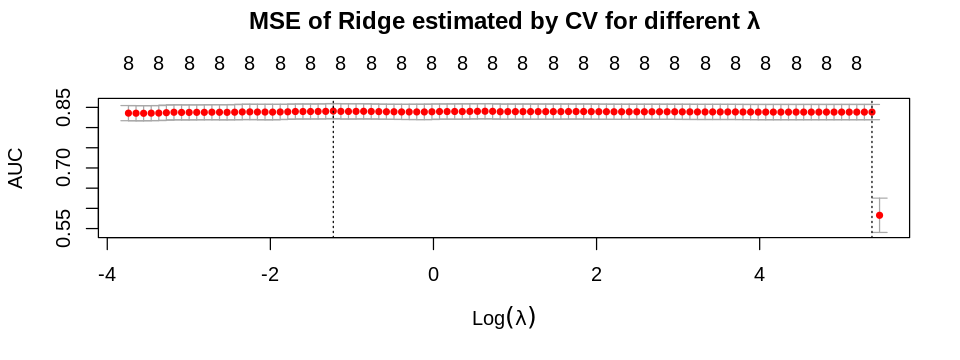

NULL

NULL

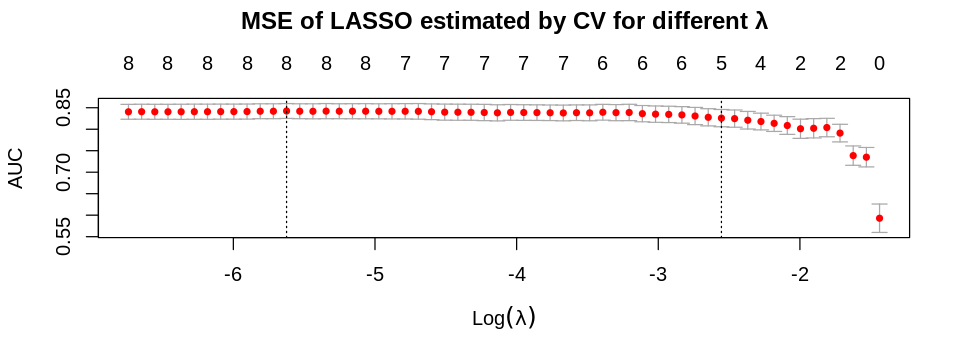

In [15]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
options(repr.plot.width = 8, repr.plot.height = 3)

# Cross validation to select optimum lambda for largest AUC from Ridge regression
total_heart_cv_lambda_ridge_AUC <- cv.glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 0,
    family = "binomial",
    type.measure = "auc",
    nfolds = 10
)

total_heart_cv_lambda_ridge_plot_AUC <- plot(total_heart_cv_lambda_ridge_AUC, main = "MSE of Ridge estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_ridge_AUC$lambda.min)

# Cross validation to select optimum lambda for largest AUC from LASSO regression
total_heart_cv_lambda_LASSO_AUC <- cv.glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 1,
    family = "binomial",
    type.measure = "auc",
    nfolds = 10
)

total_heart_cv_lambda_LASSO_plot_AUC <- plot(total_heart_cv_lambda_LASSO_AUC, main = "MSE of LASSO estimated by CV for different λ\n\n") 
# log(total_heart_cv_lambda_LASSO_AUC$lambda.1se)

total_heart_cv_lambda_ridge_plot_AUC
total_heart_cv_lambda_LASSO_plot_AUC

#### 3.2.2. AUC for Ordinary Model
- AUC for ordinary model obtained to compare against regularised regression models.

In [16]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!
num.folds <- 10

folds <- createFolds(total_heart_train$num, k = num.folds)

regr.cv <- NULL
for (fold in 1:num.folds) {
    train.idx <- setdiff(1:nrow(total_heart_train), folds[[fold]])
    regr.cv[[fold]] <- glm(num ~ ., data = total_heart_train, subset = train.idx,family = "binomial")
}

pred.cv <- NULL
auc.cv <- numeric(num.folds) 

for (fold in 1:num.folds) {
    test.idx <- folds[[fold]]
    pred.cv[[fold]] <- data.frame(obs = total_heart_train$num[test.idx],
    pred=predict(regr.cv[[fold]], newdata = total_heart_train, type = "response")[test.idx])
    auc.cv[fold] <- roc(obs ~ pred, data = pred.cv[[fold]])$auc
}

total_heart_cv_ordinary <- mean(auc.cv)
# cat("Cross-validation AUC for the ordinary logistic model:", total_heart_cv_ordinary)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



#### 3.2.3. Fitting of Regression Models, Visualisation of ROC Curves
- For LASSO, we can select a considerably simpler model without significant reduction of the AUC, so `total_heart_cv_lambda_ridge_AUC$lambda.min` is used.

In [17]:
# Fit Ridge regression model
total_heart_ridge_max_AUC <- glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 0,
    family = "binomial",
    lambda = total_heart_cv_lambda_ridge_AUC$lambda.min
)
total_heart_ridge_max_AUC

# Fit LASSO regression model
# Can select a considerably simpler model (three variables instead of seven) without having a significant reduction of the AUC
total_heart_LASSO_1se_AUC <- glmnet(
    x = as.matrix(total_heart_train_X), 
    y = as.matrix(total_heart_train_Y),
    alpha = 1,
    family = "binomial",
    lambda = total_heart_cv_lambda_LASSO_AUC$lambda.1se
)
total_heart_LASSO_1se_AUC

total_heart_AUC_models <- tibble(
    model = c("Ordinary", "Ridge", "LASSO"),
    # auc = c(breast_cancer_cv_ordinary, max(breast_cancer_cv_lambda_ridge$cvm))
    # model = c("Ridge", "LASSO"),
    auc = c(total_heart_cv_ordinary, max(total_heart_cv_lambda_ridge_AUC$cvm), total_heart_cv_lambda_LASSO_AUC$cvm[total_heart_cv_lambda_LASSO_AUC$index["1se",]])
)
total_heart_AUC_models

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”



Call:  glmnet(x = as.matrix(total_heart_train_X), y = as.matrix(total_heart_train_Y),      family = "binomial", alpha = 0, lambda = total_heart_cv_lambda_ridge_AUC$lambda.min) 

  Df  %Dev Lambda
1  8 23.43 0.2928

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”



Call:  glmnet(x = as.matrix(total_heart_train_X), y = as.matrix(total_heart_train_Y),      family = "binomial", alpha = 1, lambda = total_heart_cv_lambda_LASSO_AUC$lambda.1se) 

  Df  %Dev  Lambda
1  5 21.77 0.07776

model,auc
<chr>,<dbl>
Ordinary,0.8416843
Ridge,0.8408497
LASSO,0.8258273


Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



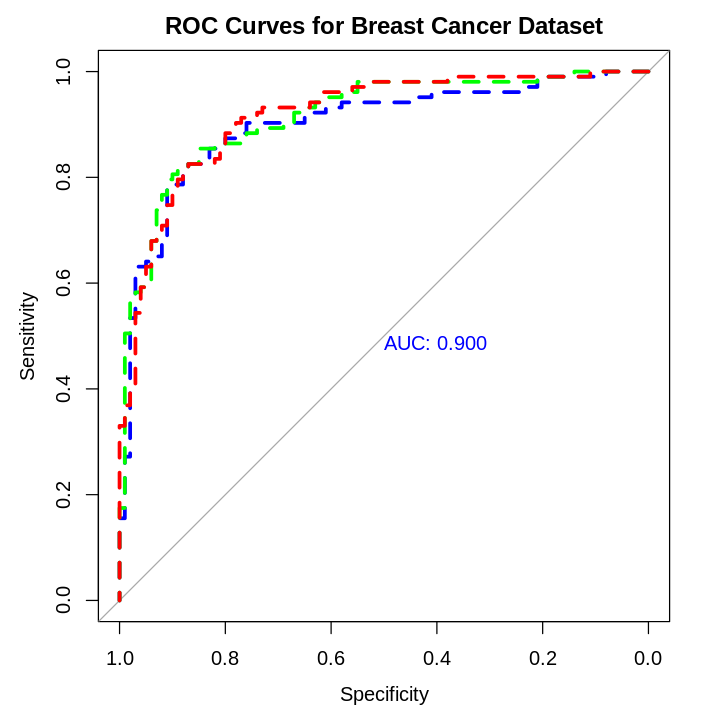

In [18]:
options(repr.plot.width = 6, repr.plot.height = 6) # Adjust these numbers so the plot looks good in your desktop.

# model_matrix_X_test <- model.matrix(object = num ~ ., data = total_heart_test)[, -1]

ROC_lasso <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_LASSO_1se_AUC,
                        newx = as.matrix(total_heart_test_X))[,"s0"],
) 

ROC_ridge <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_ridge_max_AUC, 
                        newx = as.matrix(total_heart_test_X))[,"s0"]
)

ROC_ordinary <- roc(
    response = total_heart_test_Y,
    predictor = predict(total_heart_binary_log_model_train, 
                        newdata = total_heart_test)
)

plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Breast Cancer Dataset"
)
lines.roc(ROC_ridge, col = "green", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_ordinary, col = "red", lwd = 3, lty = 2, print.auc=TRUE)

## 4. Discussion 
### 4.1. Logistic Regression Models with Stepwise Akaike Information Criterion (AIC) 
The confusion matrix of our logistic regression model with `num` as response and all other variables as input generated an 84.24% accuracy, with a Kappa value of 0.685. The result of the `stepAIC()` method applied to find models which explain the most variation in data included the terms `age`, `sex`, `cp`, `trestbps`, `thalach`, and `exang`, with an AIC of 454.78. After using the function `stepAIC()`, the out-of-sample error rate becomes smaller with value 0.5222 compared with training error rate 0.5369 of the regular model, implying that the new model fits the testing data set better. However, the `stepAIC()` model becomes less accurate as a consequence, with an accuracy of 82.76% and a Kappa value of 0.6554.

### 4.2. Logistic Regression Models with Regularisation methods 
The ordinary regression model performs better in distinguishing between positive and negative classes compared to the regularised models, with the largest AUC value at 0.8417. This suggests that the regularised methods may have excessively shrunken the coefficients, leading to underfitting. The LASSO regression model has also been selected such that it would be significantly simpler, leading to a lower AUC value.

### 4.3. Conclusion 
In conclusion, the model most effective in predicting each patient’s diagnosis would be the one obtained through `stepAIC()`, with the variables `age`, `sex`, `cp`, `trestbps`, `thalach`, and `exang`, and without regularised regression models applied.

Quadratic or interaction terms to the logistic regression model could be added to account for the possibility that the explanatory variables are not independent and the relationship between log odds of the response variable and explanatory variables may not be linear. We could also optimise regularisation parameters through techniques such as cross-validation to find the best model, which can access model performance using techniques like k-folds to ensure robustness.

This project could lead to several relevant future questions, such as: 
- How do lifestyle and environment factors affect the diagnosis of coronary heart disease?
- How can big data and predictive analytics be employed to improve the accuracy of the logistic regression model?
- How to use this logistic regression model to predict an individual’s risk of coronary heart disease?

## References
- Lloyd-Jones, D. M., Larson, M. G., Beiser, A., & Levy, D. (1999, February 19). Lifetime risk of developing coronary heart disease. The Lancet. https://www.sciencedirect.com/science/article/pii/S0140673698102799?via%3Dihub 
- Lawes, C. M. M., Bennett, D. A., Lewington, S., & Rodgers, A. (2003, January 22). Blood pressure and coronary heart disease: A review of the evidence. Seminars in Vascular Medicine. https://www.thieme-connect.com/products/ejournals/html/10.1055/s-2002-36765 
- Law, M. R., Wald, N. J., & Thompson, S. G. (1994, February 5). By how much and how quickly does reduction in serum cholesterol concentration lower risk of ischaemic heart disease?. The BMJ. https://www.bmj.com/content/308/6925/367.full 
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328 
- Hajar R. (2017). Risk Factors for Coronary Artery Disease: Historical Perspectives. Heart views : the official journal of the Gulf Heart Association, 18(3), 109–114. https://doi.org/10.4103/HEARTVIEWS.HEARTVIEWS_106_17 
- Schell, A. (n.d.). Empirical logit plots for logistic regression specification search - Alex Schell. https://alexschell.github.io/emplogit.html 